# Customer Analysis Case Study

<b> Importing libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<b> Loading Data

In [30]:
ca_df=pd.read_csv("Data/customer_cs_response.csv")

In [31]:
ca_df

,number,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [32]:
def drop_columns(ca_df) : #delete the first ''number'' column that is redundant
    ca_df.drop(columns=["number"], inplace=True)
    return ca_df

In [36]:
drop_columns(ca_df)

KeyError: "['number'] not found in axis"

In [45]:
ca_df

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [41]:
ca_df.dtypes #checking the data types

state                         object
customer lifetime value      float64
education                     object
gender                        object
income                         int64
monthly premium auto           int64
number of open complaints    float64
policy type                   object
total claim amount           float64
vehicle class                 object
sales channel                 object
response                      object
dtype: object

<b> Turn open complains into integers

In [48]:
ca_df['number of open complaints'] = ca_df['number of open complaints'].fillna(0)

In [51]:
ca_df['number of open complaints'] = ca_df['number of open complaints'].astype('int')

In [50]:
ca_df.dtypes

state                         object
customer lifetime value      float64
education                     object
gender                        object
income                         int64
monthly premium auto           int64
number of open complaints      int32
policy type                   object
total claim amount           float64
vehicle class                 object
sales channel                 object
response                      object
dtype: object

<b> Removing duplicates

In [52]:
ca_df.drop_duplicates()

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,Arizona,4809.216960,College,M,48029,61,0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,0,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,0,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4,Personal Auto,618.288849,SUV,Branch,No


In [53]:
ca_df

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,Arizona,4809.216960,College,M,48029,61,0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,0,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,0,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4,Personal Auto,618.288849,SUV,Branch,No


<b> Replacing null values – Replace missing values with means of the column (for numerical columns)


In [77]:
ca_df._get_numeric_data() #checking the columns with numeric input

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,4809.216960,48029,61,0,292.800000
1,2228.525238,0,64,0,744.924331
2,14947.917300,22139,100,0,480.000000
3,22332.439460,49078,97,0,484.013411
4,9025.067525,23675,117,0,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,0,1214.400000
10906,5259.444853,61146,65,0,273.018929
10907,23893.304100,39837,201,0,381.306996
10908,11971.977650,64195,158,4,618.288849


In [78]:
ca_df[ca_df['monthly premium auto'].isna()==True] # checking rows that are null based on a specific column


,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response


In [82]:
ca_df[ca_df['total claim amount'].isna()==True] 

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response


In [83]:
ca_df[ca_df['income'].isna()==True] 

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response


In [79]:
ca_df.loc[ca_df.isnull().any(axis=1)] #check for missing values

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
5,NaN,4745.181764,High School or Below,M,50549,61,0,Personal Auto,292.800000,Four-Door Car,Agent,NaN
11,NaN,2420.711888,Bachelor,M,31710,62,0,Corporate Auto,199.551735,Two-Door Car,Call Center,NaN
58,NaN,14019.833140,College,M,31739,71,0,Personal Auto,469.882367,Two-Door Car,Call Center,NaN
62,NaN,2108.493744,Bachelor,M,0,61,0,Personal Auto,351.856810,Two-Door Car,Agent,NaN
87,Oregon,8126.766397,College,F,14616,107,0,Personal Auto,513.600000,NaN,Agent,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10879,California,18611.453560,Master,F,49673,232,0,Personal Auto,1021.654003,NaN,Web,No
10883,Oregon,22563.618380,High School or Below,M,23046,65,3,Personal Auto,1.687291,NaN,Branch,No
10890,Oregon,4660.399573,Bachelor,F,89834,116,0,Corporate Auto,43.155950,NaN,Branch,No
10894,NaN,6314.492009,Master,F,66947,78,0,Personal Auto,374.400000,Four-Door Car,Agent,NaN


- <b> Activity 4 </b>
    - Show a plot of the total number of responses.
    - Show a plot of the response rate by the sales channel.
    - Show a plot of the response rate by the total claim amount.
    - Show a plot of the response rate by income.
    - Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
    - Plot the Correlation Heatmap.

In [56]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      10279 non-null  object 
 1   customer lifetime value    10910 non-null  float64
 2   education                  10910 non-null  object 
 3   gender                     10910 non-null  object 
 4   income                     10910 non-null  int64  
 5   monthly premium auto       10910 non-null  int64  
 6   number of open complaints  10910 non-null  int32  
 7   policy type                10910 non-null  object 
 8   total claim amount         10910 non-null  float64
 9   vehicle class              10288 non-null  object 
 10  sales channel              10910 non-null  object 
 11  response                   10279 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 980.3+ KB


In [57]:
ca_df.describe()

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,0.361962,434.888330
std,6885.081434,30359.195670,34.442532,0.890134,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,4014.453113,0.000000,68.000000,0.000000,271.082527
50%,5771.147235,33813.500000,83.000000,0.000000,382.564630
75%,8992.779137,62250.750000,109.000000,0.000000,547.200000
max,83325.381190,99981.000000,298.000000,5.000000,2893.239678


In [58]:
#Total number of responses broken down by response kind
ca_df.response.value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

<AxesSubplot:>

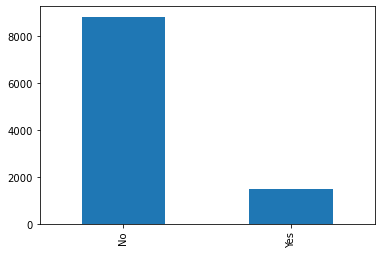

In [71]:
#Show a plot of the total number of responses.
ca_df['response'].value_counts().plot(kind="bar") 

<AxesSubplot:>

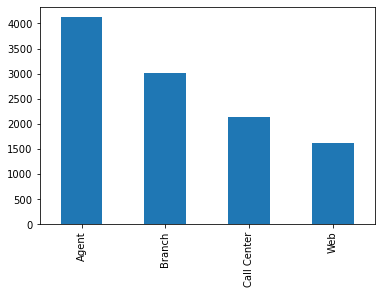

In [91]:
 #Show a plot of the response rate by the sales channel.
ca_df['sales channel'].value_counts().plot(kind="bar")

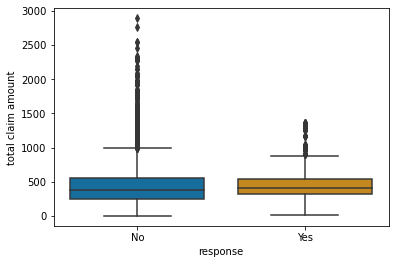

In [65]:
#Show a plot of the distribution of the total claim amount, broken down by response kind. 
sns.boxplot(y='total claim amount', x='response', data=ca_df, palette="colorblind");

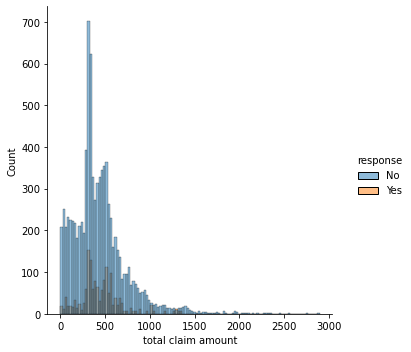

In [73]:
#Total claim and response, another look
sns.displot(ca_df, x="total claim amount", hue="response");

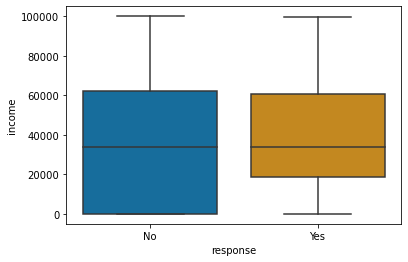

In [74]:
#Show a plot of the response rate by income.
sns.boxplot(y='income', x='response', data=ca_df, palette="colorblind");


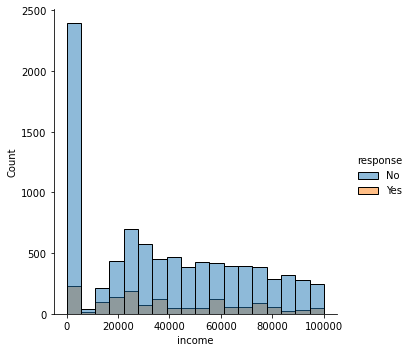

In [76]:
sns.displot(ca_df, x="income", hue="response"); 

In [113]:
#create a correlation matrix of numerical data
correlations_matrix = numeric_data.corr()
correlations_matrix


,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
customer lifetime value,1.000000,0.028306,0.403069,-0.030616,0.232626
income,0.028306,1.000000,-0.009788,0.008425,-0.354141
monthly premium auto,0.403069,-0.009788,1.000000,-0.010059,0.631799
number of open complaints,-0.030616,0.008425,-0.010059,1.000000,-0.012380
total claim amount,0.232626,-0.354141,0.631799,-0.012380,1.000000


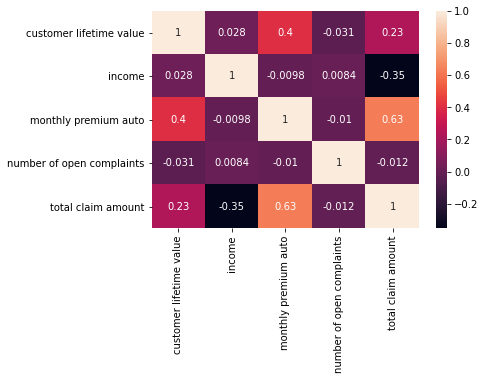

In [114]:
#plot the Correlation Heatmap. 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

- <b> Activity 5 </b>
  - Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
  - Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution
  - For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
  - Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [92]:
#numerical data
numeric_data = ca_df.select_dtypes(include=[np.number])
print(numeric_data)

       customer lifetime value  income  monthly premium auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       number of open complaints  total claim amount  
0                              0          292.800000  
1                              0          744.924331  
2                              0          480.000000  
3          

In [94]:
#categorical data
categorical_data = ca_df.select_dtypes(exclude=[np.number])
print(categorical_data)

            state education gender     policy type  vehicle class  \
0         Arizona   College      M  Corporate Auto  Four-Door Car   
1      California   College      F   Personal Auto  Four-Door Car   
2      Washington  Bachelor      M   Personal Auto            SUV   
3          Oregon   College      M  Corporate Auto  Four-Door Car   
4          Oregon  Bachelor      F   Personal Auto  Four-Door Car   
...           ...       ...    ...             ...            ...   
10905      Nevada  Bachelor      F   Personal Auto     Luxury Car   
10906      Oregon   College      F   Personal Auto  Four-Door Car   
10907     Arizona  Bachelor      F  Corporate Auto     Luxury SUV   
10908  California   College      F   Personal Auto            SUV   
10909         NaN  Bachelor      M   Personal Auto            SUV   

      sales channel response  
0             Agent       No  
1       Call Center       No  
2       Call Center       No  
3            Branch      Yes  
4            Bra

In [95]:
#checking the distribution of numerical variables

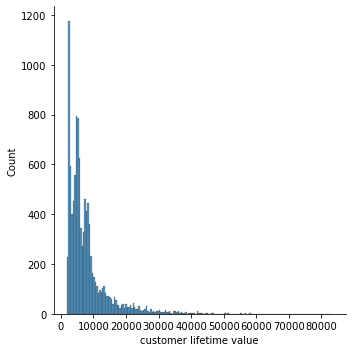

In [97]:
sns.displot(numeric_data['customer lifetime value'])

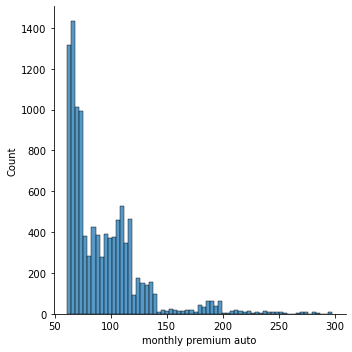

In [145]:
sns.displot(numeric_data['monthly premium auto'])

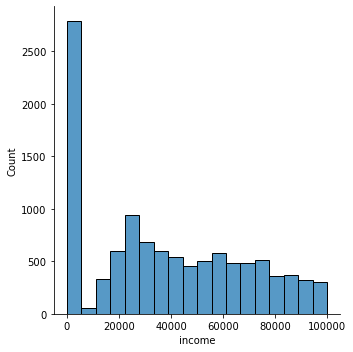

In [146]:
sns.displot(numeric_data['income'])

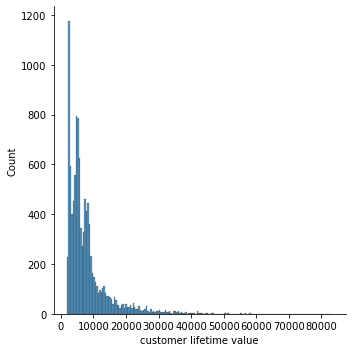

In [108]:
sns.displot(numeric_data['customer lifetime value'])

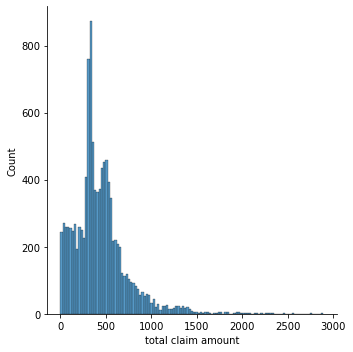

In [147]:
sns.displot(numeric_data['total claim amount'])

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:>]], dtype=object)

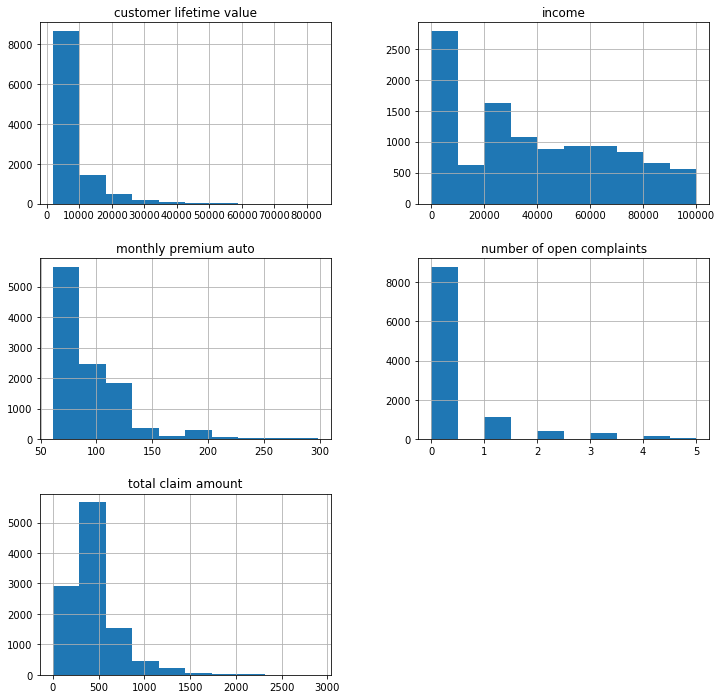

In [155]:
numeric_data.hist(figsize=(12,12))

C:\Users\Harutyunyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer lifetime value', ylabel='Density'>

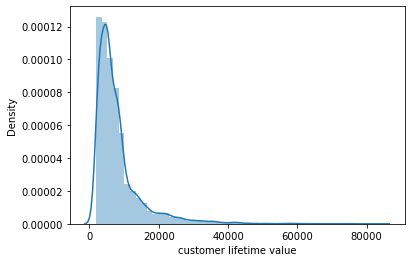

In [149]:
 #distributions for different numerical variables look like a normal distribution
sns.distplot(numeric_data['customer lifetime value']) #not sure about the function

In [137]:
#Predictive modelling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [135]:
# set up y variable
Y = numeric_data['total claim amount']
#drop that column from the rest of the columns to create a predictive model 
X = numeric_data.drop(['total claim amount'], axis=1)

In [136]:
#standartize data why do we do this?
X_scaled=StandardScaler().fit_transform(X)
X_scaled.shape

(10910, 4)

In [142]:
X_pred, X_test, Y_pred, Y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [130]:
model = linear_model.LinearRegression()

In [139]:
model.fit(X, Y)   # model train

LinearRegression()

In [143]:
result=pd.DataFrame({"Y_test":Y_test,"Y_pred":Y_pred})

In [144]:
result

,Y_test,Y_pred
0,292.800000,NaN
1,744.924331,NaN
2,NaN,480.000000
3,484.013411,NaN
4,NaN,707.925645
...,...,...
10905,NaN,1214.400000
10906,273.018929,NaN
10907,381.306996,NaN
10908,NaN,618.288849
